In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import cross_validation,metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

C:\Users\Geetanjali Tewari\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset=pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
dataset.shape

(39644, 61)

In [4]:
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
popular=dataset.shares>=1400
unpopular=dataset.shares<1400

In [6]:
#popular

In [7]:
dataset.loc[popular,'shares']=1
dataset.loc[unpopular,'shares']=0

In [8]:
#dataset.shares


In [9]:
dataset.columns[60]

'shares'

In [10]:
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [11]:
cols=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]



In [12]:
cols1=["global_subjectivity","rate_positive_words","rate_negative_words",
     "avg_positive_polarity","min_positive_polarity","max_positive_polarity","avg_negative_polarity","min_negative_polarity",
     "max_negative_polarity","title_subjectivity","abs_title_sentiment_polarity"]


In [13]:
data=dataset


In [14]:
data.shape

(39644, 61)

In [15]:
cols2=["url","timedelta","shares"]

In [16]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [17]:
for i in data.columns:
    if i not in cols and i not in cols1 and i not in cols2:
        data[i]=np.log(1.001+data[i])

data.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364,0


In [18]:
#data

In [19]:
features=list(dataset.columns[2:60])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(dataset[features],dataset['shares'],test_size=0.4,random_state=0)

In [21]:
X_train.shape

(23786, 58)

In [22]:
y_train.shape

(23786,)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

## RANDOM FOREST

In [24]:
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [25]:
clf_rf=rf.fit(X_train,y_train)

In [27]:
print ("Random Forest")
print ("Accuracy= ",clf_rf.score(X_test,y_test))
y_pred=clf_rf.predict(X_test)
precision=precision_score(y_test,y_pred)
print ("Precision= ",precision)
recall=recall_score(y_test,y_pred)
print ("Recall= ",recall)
f1_scorer=f1_score(y_test,y_pred)
print ("f1_score= ",f1_scorer)

Random Forest
Accuracy=  0.662883087400681
Precision=  0.6711796692930863
Recall=  0.7173526272091092
f1_score=  0.6934984520123839


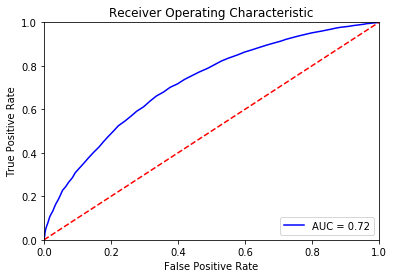

In [28]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## NAIVE BAYES

In [29]:
nb=BernoulliNB()

In [30]:
clf_nb=nb.fit(X_train,y_train)

In [31]:
print ("Naive Bayes")
print ("Accuracy= ",clf_nb.score(X_test,y_test))
y_predn=clf_rf.predict(X_test)
precision=precision_score(y_test,y_predn)
print ("Precision= ",precision)
recall=recall_score(y_test,y_predn)
print ("Recall= ",recall)
f1_scoren=f1_score(y_test,y_predn)
print ("f1_score= ",f1_scoren)

Naive Bayes
Accuracy=  0.6101021566401816
Precision=  0.6711796692930863
Recall=  0.7173526272091092
f1_score=  0.6934984520123839


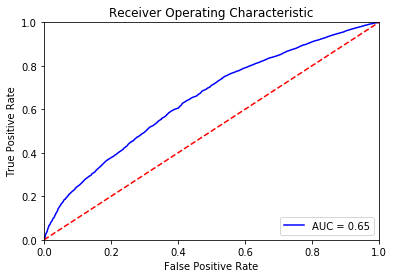

In [32]:
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KNN


In [33]:
knn=KNeighborsClassifier()

In [34]:
clf_knn=knn.fit(X_train,y_train)

In [35]:
accuracy=clf_knn.score(X_test,y_test)

In [36]:
print ("KNN")
print ("Accuracy= ",accuracy)
y_predk=clf_rf.predict(X_test)
precision=precision_score(y_test,y_predk)
print ("Precision= ",precision)
recall=recall_score(y_test,y_predk)
print ("Recall= ",recall)
f1_scorek=f1_score(y_test,y_predk)
print ("F1_score= ",f1_scorek)

KNN
Accuracy=  0.6104805145667802
Precision=  0.6711796692930863
Recall=  0.7173526272091092
F1_score=  0.6934984520123839


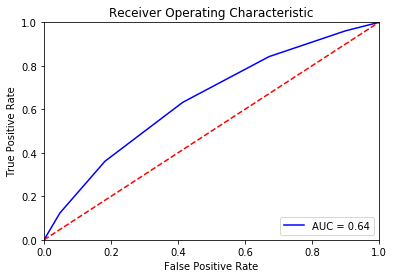

In [37]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM

In [38]:
from sklearn import svm

In [39]:
svm=svm.SVC(kernel="rbf",probability=True)

In [40]:
clf_svm=svm.fit(X_train,y_train)

In [41]:
accuracy=clf_svm.score(X_test,y_test)

In [42]:
print ("SVM")
print ("Accuracy= ",accuracy)
y_pred=clf_rf.predict(X_test)
precision=precision_score(y_test,y_pred)
print ("Precision=" ,precision)
recall=recall_score(y_test,y_pred)
print ("Recall=",recall)
f1_scoresvm=f1_score(y_test,y_pred)
print ("F1 score=" ,f1_scoresvm)

SVM
Accuracy=  0.6570815991928364
Precision= 0.6711796692930863
Recall= 0.7173526272091092
F1 score= 0.6934984520123839


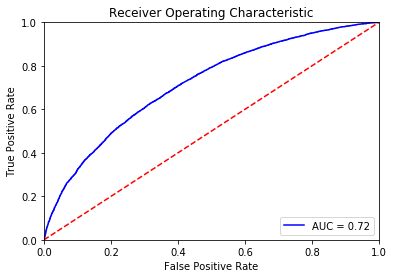

In [43]:
probs = svm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ADABOOST

In [44]:
ada=AdaBoostClassifier(n_estimators=100)

In [45]:
clf_ada=ada.fit(X_train,y_train)

In [46]:
accuracy=clf_ada.score(X_test,y_test)

In [47]:
print ("AdaBoost")
print ("Accuracy= ",accuracy)
y_pred=clf_rf.predict(X_test)
precision=precision_score(y_test,y_pred)

print ("Precision=" ,precision)
recall=recall_score(y_test,y_pred)
print ("Recall=" ,recall)
f1_scorea=f1_score(y_test,y_pred)
print ("F1 score=",f1_scorea)

AdaBoost
Accuracy=  0.6591625677891285
Precision= 0.6711796692930863
Recall= 0.7173526272091092
F1 score= 0.6934984520123839


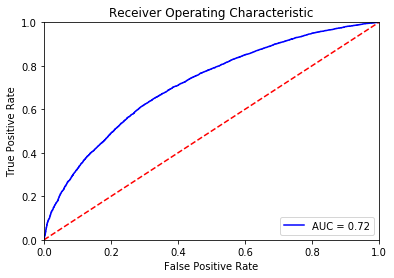

In [48]:
probs = ada.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()